`pygsti` provides support for many different _plots_ you may want to make with your estimates.

In this tutorial, we go through the more commonly-used plots.

In [1]:
#Import the GST module -- you probably want this at the beginning of every notebook
import pygsti
import pygsti.report.plotting as pplt
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load up the data necessary to make the plots...

#Gate sets
gs_target = pygsti.io.load_gateset("tutorial_files/Example_Gateset.txt")
gs_mc2gst = pygsti.io.load_gateset("tutorial_files/Example_MC2GST_Gateset.txt")
gs_elgst = pygsti.io.load_gateset("tutorial_files/Example_eLGST_Gateset.txt")

#Data set
ds = pygsti.io.load_dataset("tutorial_files/Example_Dataset.txt", cache=False)

#Fiducials, germs, and maximum lengths (necessary to label the plots)
fiducialList = pygsti.io.load_gatestring_list("tutorial_files/Example_FiducialList.txt")
germList = pygsti.io.load_gatestring_list("tutorial_files/Example_GermsList.txt")
maxLengthList = json.load(open("tutorial_files/Example_maxLengths.json","r"))
specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
strs = pygsti.construction.get_spam_strs(specs)

print "Gates (%d): " % len(gs_target.gates), gs_target.gates.keys()
print "Fiducials (%d): " % len(fiducialList), map(str,fiducialList)
print "Germs (%d): " % len(germList),map(str,germList)
print "Dataset has %d gate strings" % len(ds)

Loading tutorial_files/Example_Dataset.txt: 100%


Gates (3):  ['Gi', 'Gx', 'Gy']
Fiducials (6):  ['{}', 'Gx', 'Gy', 'GxGx', 'GxGxGx', 'GyGyGy']
Germs (11):  ['Gx', 'Gy', 'Gi', 'GxGy', 'GxGyGi', 'GxGiGy', 'GxGiGi', 'GyGiGi', 'GxGxGiGy', 'GxGyGyGi', 'GxGxGyGxGyGy']
Dataset has 2737 gate strings


In [3]:
## Create a gateset with target gates but SPAM ops given by contracted LGST 
#specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
#gs_lgst = pygsti.do_lgst(ds, specs, targetGateset=gs_target, svdTruncateTo=4, verbosity=0)
#gs_after_gauge_opt = pygsti.optimize_gauge(gs_lgst, "target", targetGateset=gs_target)
#gs_clgst = pygsti.contract(gs_after_gauge_opt, "CPTP")
#
#gs_targetspam = gs_target.copy()
#gs_targetspam.preps = [v.copy() for v in gs_clgst.preps]
#gs_targetspam.effects = [v.copy() for v in gs_clgst.effects]
#gs_targetspam.make_spams()

#print "TargetSpam: ", pygsti.chi2( ds, gs_targetspam)
#print "Constrained LGST: ", pygsti.chi2( ds, gs_clgst )

In [4]:
## Debug: Check Chi2 gradient and hessian (takes a long time); no output is GOOD
#chi2_elgst, dchi2_elgst, d2chi2_elgst = pygsti.chi2( ds, gs_elgst, returnDeriv=True,
#                                                             returnHessian=True, check=True )
#chi2_lsgst, dchi2_lsgst, d2chi2_lsgst = pygsti.chi2( ds, gs_mc2gst, returnDeriv=True,
#                                                             returnHessian=True, check=True )

In [5]:
print "eLGST: ", pygsti.chi2( ds, gs_elgst)
print "MC2GST: ", pygsti.chi2( ds, gs_mc2gst)

eLGST:  

12017.1124926
LSGST:  

2799.71352197


In [6]:
#Collect data we need for making plots
Xs = maxLengthList[1:]; xlbl = r"$L$ (max length)"
Ys = germList; ylbl = "Germ"
gateStrDict = { (x,y):pygsti.construction.repeat_with_max_length(y,x,False) for x in Xs for y in Ys }

#remove duplicates by replacing duplicate strings with None
runningList = []
for x in Xs:
    for y in Ys:
        if gateStrDict[(x,y)] in runningList:
            gateStrDict[(x,y)] = None
        else: runningList.append( gateStrDict[(x,y)] )

In [7]:
#Note on internals of plotting: lower left is origin in (rho-vec,E-vec index space) of sub-matrices
#M = diag(range(10))
#fig,axes = subplots()
#axes.pcolormesh(M)
#print M


## $\chi^2$ Plots

One of the most straightforward ways to evaluate GST estimates is to ask whether the estimates correctly reproduce the observed frequencies of the counts (or "clicks") for the experiments. The answer to this question is to compute the $\chi^{2}$ function for the gateset.

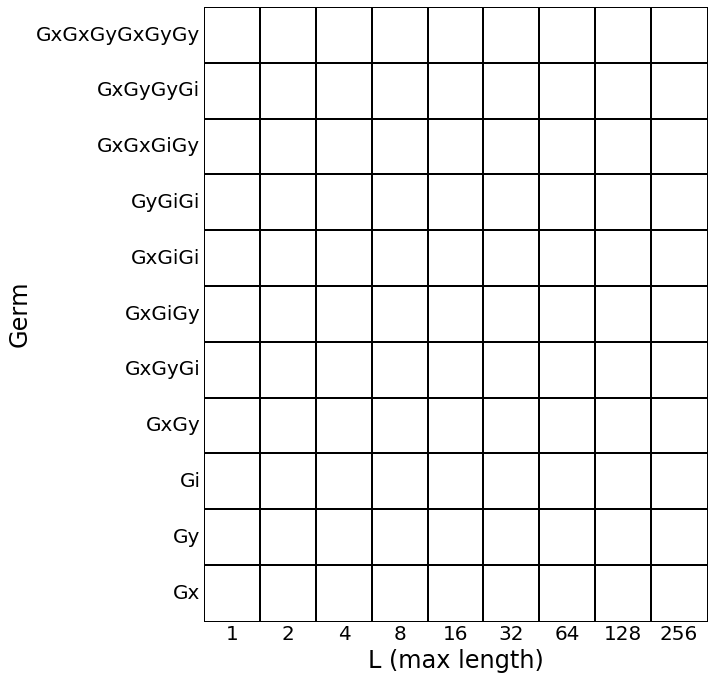

In [8]:
#Demonstrates a blank chi2 boxplot
pplt.blank_boxplot( Xs, Ys, gateStrDict, strs, xlbl, ylbl, sumUp=True, ticSize=20)

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:357: RuntimeWarning: invalid value encountered in greater
  return_value = _np.where(_np.greater(norm_trans, lin_norm_value),
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


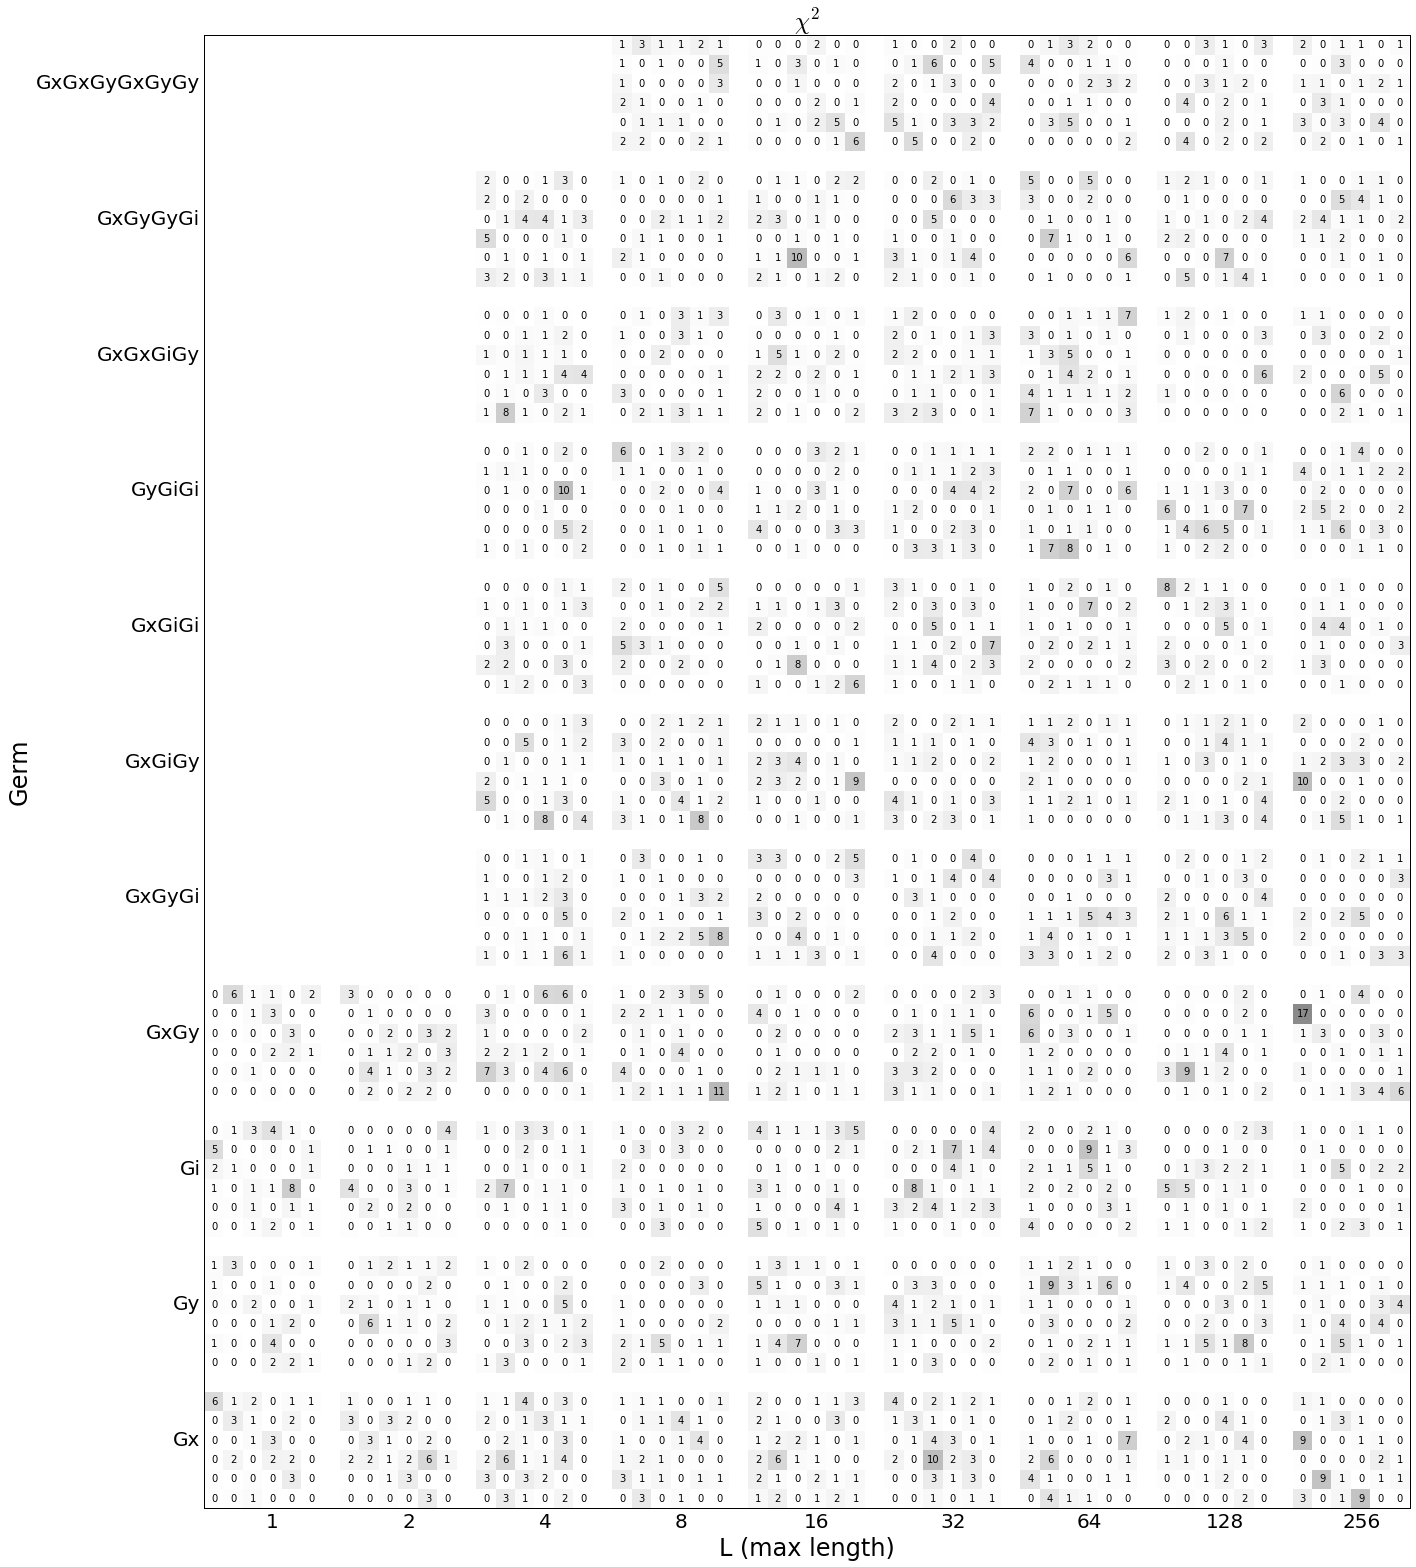

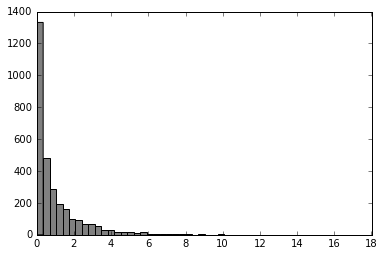

In [9]:
#Compute the chi2 scores for the estimated gateset using the MC2GST algorithm
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                   scale=1.0, sumUp=False, histogram=True)

Because most of the $\chi^{2}$ values are close to 0, we conclude this estimated gateset does a good job of reproducing the observed frequencies. Which it should, since the figure of merit we were using in our estimation was the $\chi^{2}$ function!

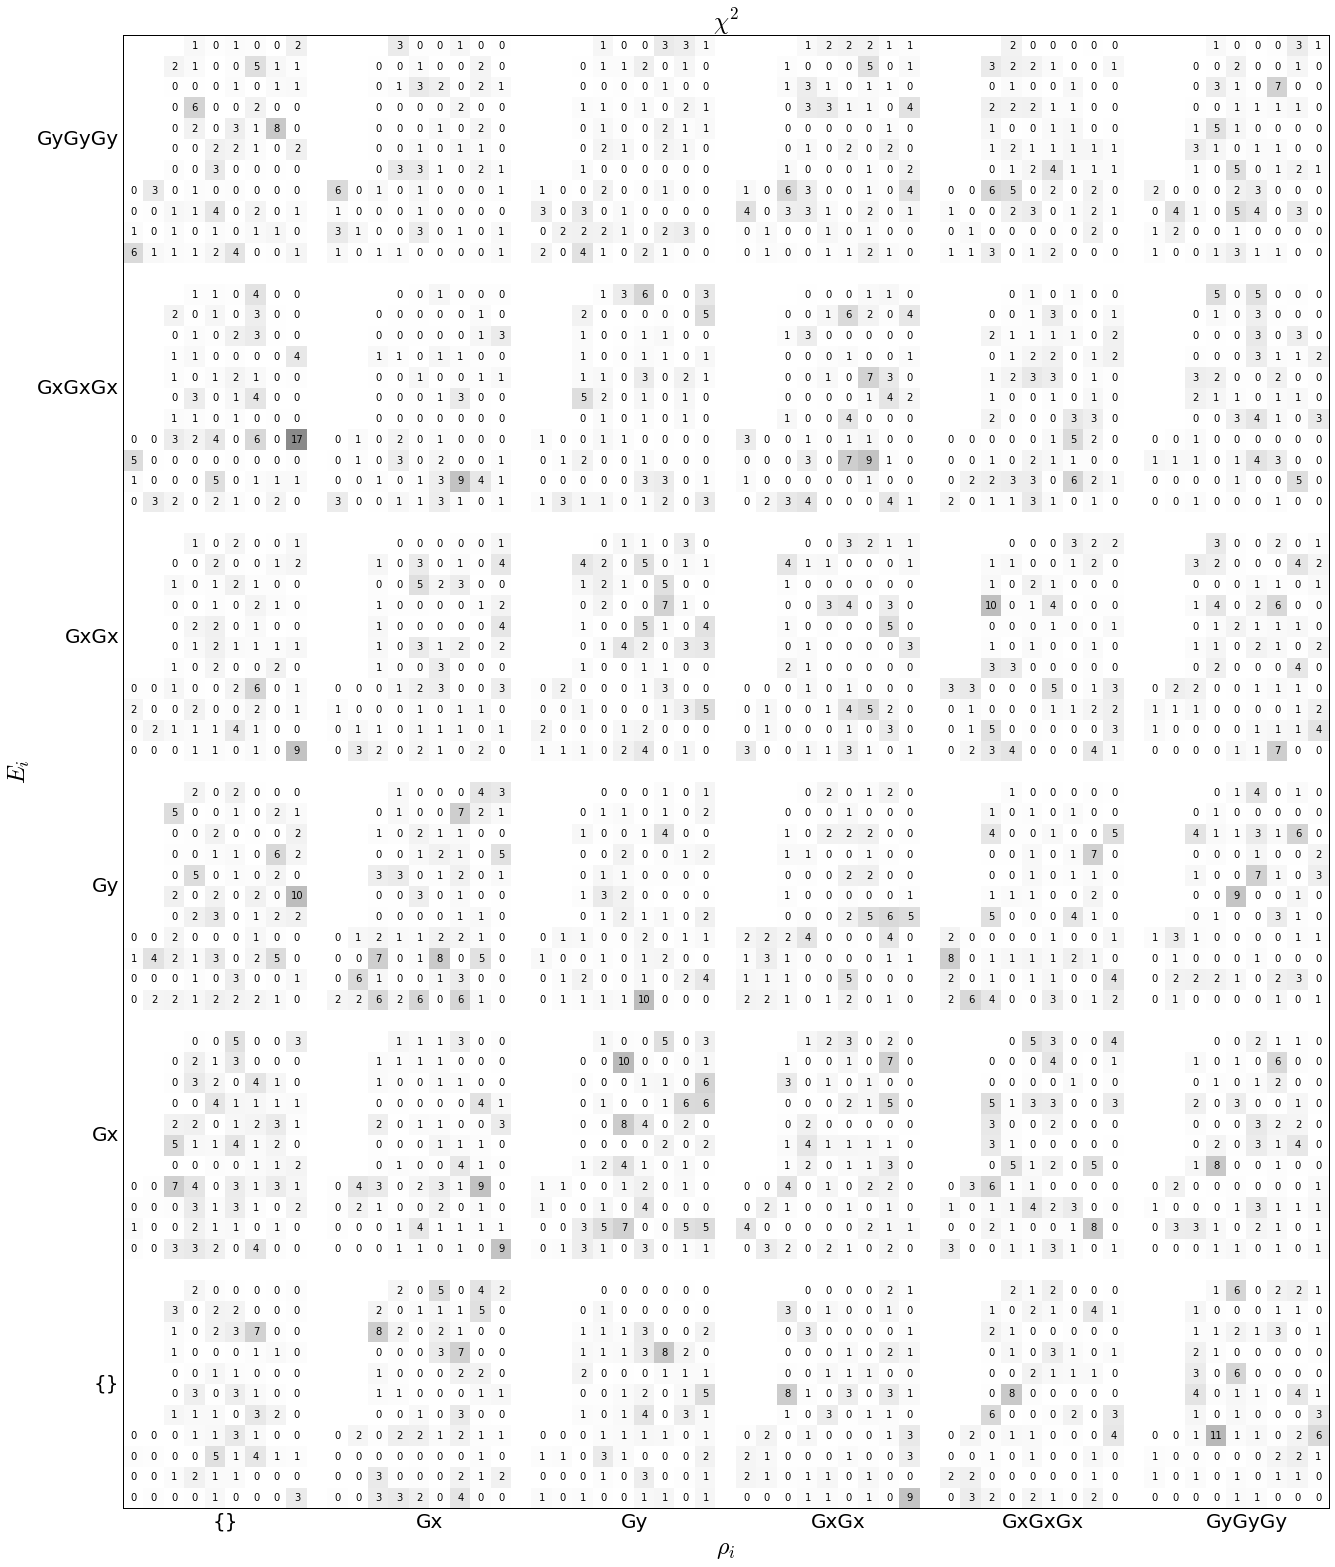

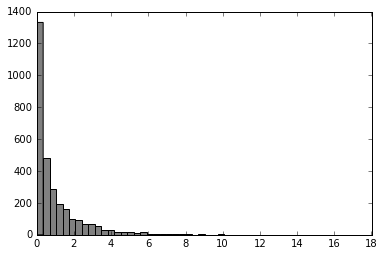

In [10]:
#Make another chi2 plot, with different x and y labels
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
               scale=1.0, sumUp=False, histogram=True, invert=True)

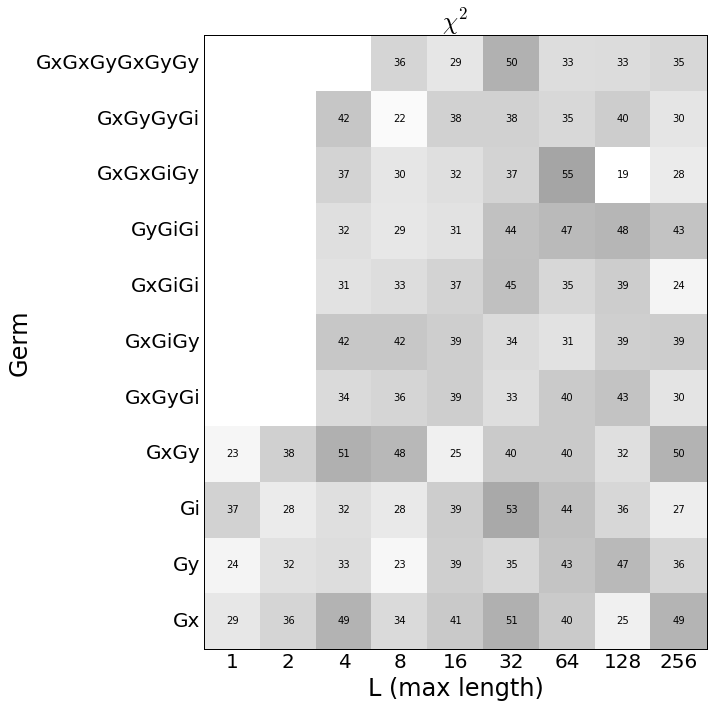

In [11]:
#Sum up the chi2 boxes for each (Germ, L) pair
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                scale=1.0, sumUp=True)

## Direct $\chi^2$ Plots

In [12]:
directLGST = pplt.direct_lgst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, verbosity=2)
directLSGST = pplt.direct_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, minProbClipForWeighting=1e-2, 
                                probClipInterval=(-1e6,1e6), verbosity=2)

#focusedGS = AT.focused_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
#                                ds, specs, gs_mc2gst, minProbClipForWeighting=1e-2, 
#                                probClipInterval=(-1e6,1e6), verbosity=2)

--- Direct LGST precomputation ---
--- Computing gateset for string 0 of 84 ---
--- LGST ---
--- Computing gateset for string 1 of 84 ---
--- LGST ---
--- Computing gateset for string 2 of 84 ---
--- LGST ---
--- Computing gateset for string 3 of 84 ---
--- LGST ---
--- Computing gateset for string 4 of 84 ---
--- LGST ---
--- Computing gateset for string 5 of 84 ---
--- LGST ---
--- Computing gateset for string 6 of 84 ---
--- LGST ---
--- Computing gateset for string 7 of 84 ---
--- LGST ---
--- Computing gateset for string 8 of 84 ---
--- LGST ---
--- Computing gateset for string 9 of 84 ---
--- LGST ---


--- Computing gateset for string 10 of 84 ---
--- LGST ---
--- Computing gateset for string 11 of 84 ---
--- LGST ---
--- Computing gateset for string 12 of 84 ---
--- LGST ---
--- Computing gateset for string 13 of 84 ---
--- LGST ---
--- Computing gateset for string 14 of 84 ---
--- LGST ---
--- Computing gateset for string 15 of 84 ---
--- LGST ---
--- Computing gateset for string 16 of 84 ---
--- LGST ---
--- Computing gateset for string 17 of 84 ---
--- LGST ---
--- Computing gateset for string 18 of 84 ---
--- LGST ---
--- Computing gateset for string 19 of 84 ---
--- LGST ---


--- Computing gateset for string 20 of 84 ---
--- LGST ---
--- Computing gateset for string 21 of 84 ---
--- LGST ---
--- Computing gateset for string 22 of 84 ---
--- LGST ---
--- Computing gateset for string 23 of 84 ---
--- LGST ---
--- Computing gateset for string 24 of 84 ---
--- LGST ---
--- Computing gateset for string 25 of 84 ---
--- LGST ---
--- Computing gateset for string 26 of 84 ---
--- LGST ---
--- Computing gateset for string 27 of 84 ---
--- LGST ---
--- Computing gateset for string 28 of 84 ---
--- LGST ---
--- Computing gateset for string 29 of 84 ---
--- LGST ---


--- Computing gateset for string 30 of 84 ---
--- LGST ---
--- Computing gateset for string 31 of 84 ---
--- LGST ---
--- Computing gateset for string 32 of 84 ---
--- LGST ---
--- Computing gateset for string 33 of 84 ---
--- LGST ---
--- Computing gateset for string 34 of 84 ---
--- LGST ---
--- Computing gateset for string 35 of 84 ---
--- LGST ---
--- Computing gateset for string 36 of 84 ---
--- LGST ---
--- Computing gateset for string 37 of 84 ---
--- LGST ---
--- Computing gateset for string 38 of 84 ---
--- LGST ---
--- Computing gateset for string 39 of 84 ---
--- LGST ---


--- Computing gateset for string 40 of 84 ---
--- LGST ---
--- Computing gateset for string 41 of 84 ---
--- LGST ---
--- Computing gateset for string 42 of 84 ---
--- LGST ---
--- Computing gateset for string 43 of 84 ---
--- LGST ---
--- Computing gateset for string 44 of 84 ---
--- LGST ---
--- Computing gateset for string 45 of 84 ---
--- LGST ---
--- Computing gateset for string 46 of 84 ---
--- LGST ---
--- Computing gateset for string 47 of 84 ---
--- LGST ---
--- Computing gateset for string 48 of 84 ---
--- LGST ---
--- Computing gateset for string 49 of 84 ---
--- LGST ---


--- Computing gateset for string 50 of 84 ---
--- LGST ---
--- Computing gateset for string 51 of 84 ---
--- LGST ---
--- Computing gateset for string 52 of 84 ---
--- LGST ---
--- Computing gateset for string 53 of 84 ---
--- LGST ---
--- Computing gateset for string 54 of 84 ---
--- LGST ---
--- Computing gateset for string 55 of 84 ---
--- LGST ---
--- Computing gateset for string 56 of 84 ---
--- LGST ---
--- Computing gateset for string 57 of 84 ---
--- LGST ---
--- Computing gateset for string 58 of 84 ---
--- LGST ---
--- Computing gateset for string 59 of 84 ---
--- LGST ---


--- Computing gateset for string 60 of 84 ---
--- LGST ---
--- Computing gateset for string 61 of 84 ---
--- LGST ---
--- Computing gateset for string 62 of 84 ---
--- LGST ---
--- Computing gateset for string 63 of 84 ---
--- LGST ---
--- Computing gateset for string 64 of 84 ---
--- LGST ---
--- Computing gateset for string 65 of 84 ---
--- LGST ---
--- Computing gateset for string 66 of 84 ---
--- LGST ---
--- Computing gateset for string 67 of 84 ---
--- LGST ---
--- Computing gateset for string 68 of 84 ---
--- LGST ---
--- Computing gateset for string 69 of 84 ---
--- LGST ---


--- Computing gateset for string 70 of 84 ---
--- LGST ---
--- Computing gateset for string 71 of 84 ---
--- LGST ---
--- Computing gateset for string 72 of 84 ---
--- LGST ---
--- Computing gateset for string 73 of 84 ---
--- LGST ---
--- Computing gateset for string 74 of 84 ---
--- LGST ---
--- Computing gateset for string 75 of 84 ---
--- LGST ---
--- Computing gateset for string 76 of 84 ---
--- LGST ---
--- Computing gateset for string 77 of 84 ---
--- LGST ---
--- Computing gateset for string 78 of 84 ---
--- LGST ---
--- Computing gateset for string 79 of 84 ---
--- LGST ---


--- Computing gateset for string 80 of 84 ---
--- LGST ---
--- Computing gateset for string 81 of 84 ---
--- LGST ---
--- Computing gateset for string 82 of 84 ---
--- LGST ---
--- Computing gateset for string 83 of 84 ---
--- LGST ---
--- Direct LSGST precomputation ---
--- Computing gateset for string 0 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 72.2264 (192 data params - 56 model params = expected mean of 136; p-value = 0.999999)


--- Computing gateset for string 1 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 82.1719 (192 data params - 56 model params = expected mean of 136; p-value = 0.999925)


--- Computing gateset for string 2 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 78.3733 (192 data params - 56 model params = expected mean of 136; p-value = 0.999981)


--- Computing gateset for string 3 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 89.0195 (192 data params - 56 model params = expected mean of 136; p-value = 0.999365)


--- Computing gateset for string 4 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.3393 (192 data params - 56 model params = expected mean of 136; p-value = 0.999944)


--- Computing gateset for string 5 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 99.2238 (192 data params - 56 model params = expected mean of 136; p-value = 0.992423)


--- Computing gateset for string 6 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 82.3017 (192 data params - 56 model params = expected mean of 136; p-value = 0.999922)


--- Computing gateset for string 7 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 82.9111 (192 data params - 56 model params = expected mean of 136; p-value = 0.999904)


--- Computing gateset for string 8 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.2859 (192 data params - 56 model params = expected mean of 136; p-value = 0.999615)


--- Computing gateset for string 9 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 80.8445 (192 data params - 56 model params = expected mean of 136; p-value = 0.999953)


--- Computing gateset for string 10 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.8681 (192 data params - 56 model params = expected mean of 136; p-value = 0.998945)


--- Computing gateset for string 11 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 76.8136 (192 data params - 56 model params = expected mean of 136; p-value = 0.99999)


--- Computing gateset for string 12 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 98.7683 (192 data params - 56 model params = expected mean of 136; p-value = 0.993109)


--- Computing gateset for string 13 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 78.988 (192 data params - 56 model params = expected mean of 136; p-value = 0.999976)


--- Computing gateset for string 14 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 89.1038 (192 data params - 56 model params = expected mean of 136; p-value = 0.99935)


--- Computing gateset for string 15 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 86.292 (192 data params - 56 model params = expected mean of 136; p-value = 0.999715)


--- Computing gateset for string 16 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.1746 (192 data params - 56 model params = expected mean of 136; p-value = 0.997555)


--- Computing gateset for string 17 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 95.5468 (192 data params - 56 model params = expected mean of 136; p-value = 0.996616)


--- Computing gateset for string 18 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 77.5404 (192 data params - 56 model params = expected mean of 136; p-value = 0.999986)


--- Computing gateset for string 19 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.5431 (192 data params - 56 model params = expected mean of 136; p-value = 0.999585)


--- Computing gateset for string 20 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 77.2713 (192 data params - 56 model params = expected mean of 136; p-value = 0.999988)


--- Computing gateset for string 21 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 86.903 (192 data params - 56 model params = expected mean of 136; p-value = 0.999657)


--- Computing gateset for string 22 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 88.6076 (192 data params - 56 model params = expected mean of 136; p-value = 0.999435)


--- Computing gateset for string 23 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 99.7882 (192 data params - 56 model params = expected mean of 136; p-value = 0.991494)


--- Computing gateset for string 24 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 97.4901 (192 data params - 56 model params = expected mean of 136; p-value = 0.994759)


--- Computing gateset for string 25 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 82.424 (192 data params - 56 model params = expected mean of 136; p-value = 0.999918)


--- Computing gateset for string 26 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.3451 (192 data params - 56 model params = expected mean of 136; p-value = 0.999944)


--- Computing gateset for string 27 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 92.2529 (192 data params - 56 model params = expected mean of 136; p-value = 0.998484)


--- Computing gateset for string 28 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 84.0973 (192 data params - 56 model params = expected mean of 136; p-value = 0.999857)


--- Computing gateset for string 29 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 79.841 (192 data params - 56 model params = expected mean of 136; p-value = 0.999967)


--- Computing gateset for string 30 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.6459 (192 data params - 56 model params = expected mean of 136; p-value = 0.999572)


--- Computing gateset for string 31 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 98.1268 (192 data params - 56 model params = expected mean of 136; p-value = 0.993985)


--- Computing gateset for string 32 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.5173 (192 data params - 56 model params = expected mean of 136; p-value = 0.997344)


--- Computing gateset for string 33 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 101.286 (192 data params - 56 model params = expected mean of 136; p-value = 0.98855)


--- Computing gateset for string 34 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 96.4536 (192 data params - 56 model params = expected mean of 136; p-value = 0.995836)


--- Computing gateset for string 35 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.9718 (192 data params - 56 model params = expected mean of 136; p-value = 0.998916)


--- Computing gateset for string 36 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 85.8546 (192 data params - 56 model params = expected mean of 136; p-value = 0.999751)


--- Computing gateset for string 37 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 89.3348 (192 data params - 56 model params = expected mean of 136; p-value = 0.999306)


--- Computing gateset for string 38 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 92.7594 (192 data params - 56 model params = expected mean of 136; p-value = 0.998276)


--- Computing gateset for string 39 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 88.6687 (192 data params - 56 model params = expected mean of 136; p-value = 0.999425)


--- Computing gateset for string 40 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 86.1356 (192 data params - 56 model params = expected mean of 136; p-value = 0.999728)


--- Computing gateset for string 41 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 95.852 (192 data params - 56 model params = expected mean of 136; p-value = 0.996369)


--- Computing gateset for string 42 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.7014 (192 data params - 56 model params = expected mean of 136; p-value = 0.998991)


--- Computing gateset for string 43 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.0901 (192 data params - 56 model params = expected mean of 136; p-value = 0.997604)


--- Computing gateset for string 44 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.8215 (192 data params - 56 model params = expected mean of 136; p-value = 0.999934)


--- Computing gateset for string 45 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 88.1813 (192 data params - 56 model params = expected mean of 136; p-value = 0.9995)


--- Computing gateset for string 46 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 88.3971 (192 data params - 56 model params = expected mean of 136; p-value = 0.999468)


--- Computing gateset for string 47 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.2848 (192 data params - 56 model params = expected mean of 136; p-value = 0.999945)


--- Computing gateset for string 48 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 78.4385 (192 data params - 56 model params = expected mean of 136; p-value = 0.999981)


--- Computing gateset for string 49 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.9302 (192 data params - 56 model params = expected mean of 136; p-value = 0.997071)


--- Computing gateset for string 50 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.0296 (192 data params - 56 model params = expected mean of 136; p-value = 0.997639)


--- Computing gateset for string 51 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 80.5608 (192 data params - 56 model params = expected mean of 136; p-value = 0.999958)


--- Computing gateset for string 52 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.384 (192 data params - 56 model params = expected mean of 136; p-value = 0.999074)


--- Computing gateset for string 53 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.3411 (192 data params - 56 model params = expected mean of 136; p-value = 0.999944)


--- Computing gateset for string 54 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.2985 (192 data params - 56 model params = expected mean of 136; p-value = 0.99748)


--- Computing gateset for string 55 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.9736 (192 data params - 56 model params = expected mean of 136; p-value = 0.99993)


--- Computing gateset for string 56 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 83.5012 (192 data params - 56 model params = expected mean of 136; p-value = 0.999883)


--- Computing gateset for string 57 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 77.3382 (192 data params - 56 model params = expected mean of 136; p-value = 0.999987)


--- Computing gateset for string 58 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 92.5288 (192 data params - 56 model params = expected mean of 136; p-value = 0.998374)


--- Computing gateset for string 59 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 95.4074 (192 data params - 56 model params = expected mean of 136; p-value = 0.996723)


--- Computing gateset for string 60 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 81.1474 (192 data params - 56 model params = expected mean of 136; p-value = 0.999948)


--- Computing gateset for string 61 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 82.1632 (192 data params - 56 model params = expected mean of 136; p-value = 0.999925)


--- Computing gateset for string 62 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.2215 (192 data params - 56 model params = expected mean of 136; p-value = 0.999114)


--- Computing gateset for string 63 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 97.7288 (192 data params - 56 model params = expected mean of 136; p-value = 0.994479)


--- Computing gateset for string 64 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 86.4975 (192 data params - 56 model params = expected mean of 136; p-value = 0.999696)


--- Computing gateset for string 65 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.1755 (192 data params - 56 model params = expected mean of 136; p-value = 0.997554)


--- Computing gateset for string 66 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 85.3545 (192 data params - 56 model params = expected mean of 136; p-value = 0.999787)


--- Computing gateset for string 67 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 80.1783 (192 data params - 56 model params = expected mean of 136; p-value = 0.999963)


--- Computing gateset for string 68 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.2612 (192 data params - 56 model params = expected mean of 136; p-value = 0.999618)


--- Computing gateset for string 69 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 85.0155 (192 data params - 56 model params = expected mean of 136; p-value = 0.999808)


--- Computing gateset for string 70 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.0506 (192 data params - 56 model params = expected mean of 136; p-value = 0.999641)


--- Computing gateset for string 71 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 87.2312 (192 data params - 56 model params = expected mean of 136; p-value = 0.999622)


--- Computing gateset for string 72 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 76.7853 (192 data params - 56 model params = expected mean of 136; p-value = 0.99999)


--- Computing gateset for string 73 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 93.7019 (192 data params - 56 model params = expected mean of 136; p-value = 0.997821)


--- Computing gateset for string 74 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 77.3588 (192 data params - 56 model params = expected mean of 136; p-value = 0.999987)


--- Computing gateset for string 75 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 92.9735 (192 data params - 56 model params = expected mean of 136; p-value = 0.998181)


--- Computing gateset for string 76 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 98.6021 (192 data params - 56 model params = expected mean of 136; p-value = 0.993346)


--- Computing gateset for string 77 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 99.4923 (192 data params - 56 model params = expected mean of 136; p-value = 0.991992)


--- Computing gateset for string 78 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 84.7865 (192 data params - 56 model params = expected mean of 136; p-value = 0.999822)


--- Computing gateset for string 79 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.2659 (192 data params - 56 model params = expected mean of 136; p-value = 0.999103)


--- Computing gateset for string 80 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 94.0128 (192 data params - 56 model params = expected mean of 136; p-value = 0.997649)


--- Computing gateset for string 81 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 77.0634 (192 data params - 56 model params = expected mean of 136; p-value = 0.999989)


--- Computing gateset for string 82 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 90.0668 (192 data params - 56 model params = expected mean of 136; p-value = 0.99915)


--- Computing gateset for string 83 of 84 ---
--- LGST ---
--- Least Squares GST ---
  Sum of Chi^2 = 85.3044 (192 data params - 56 model params = expected mean of 136; p-value = 0.99979)

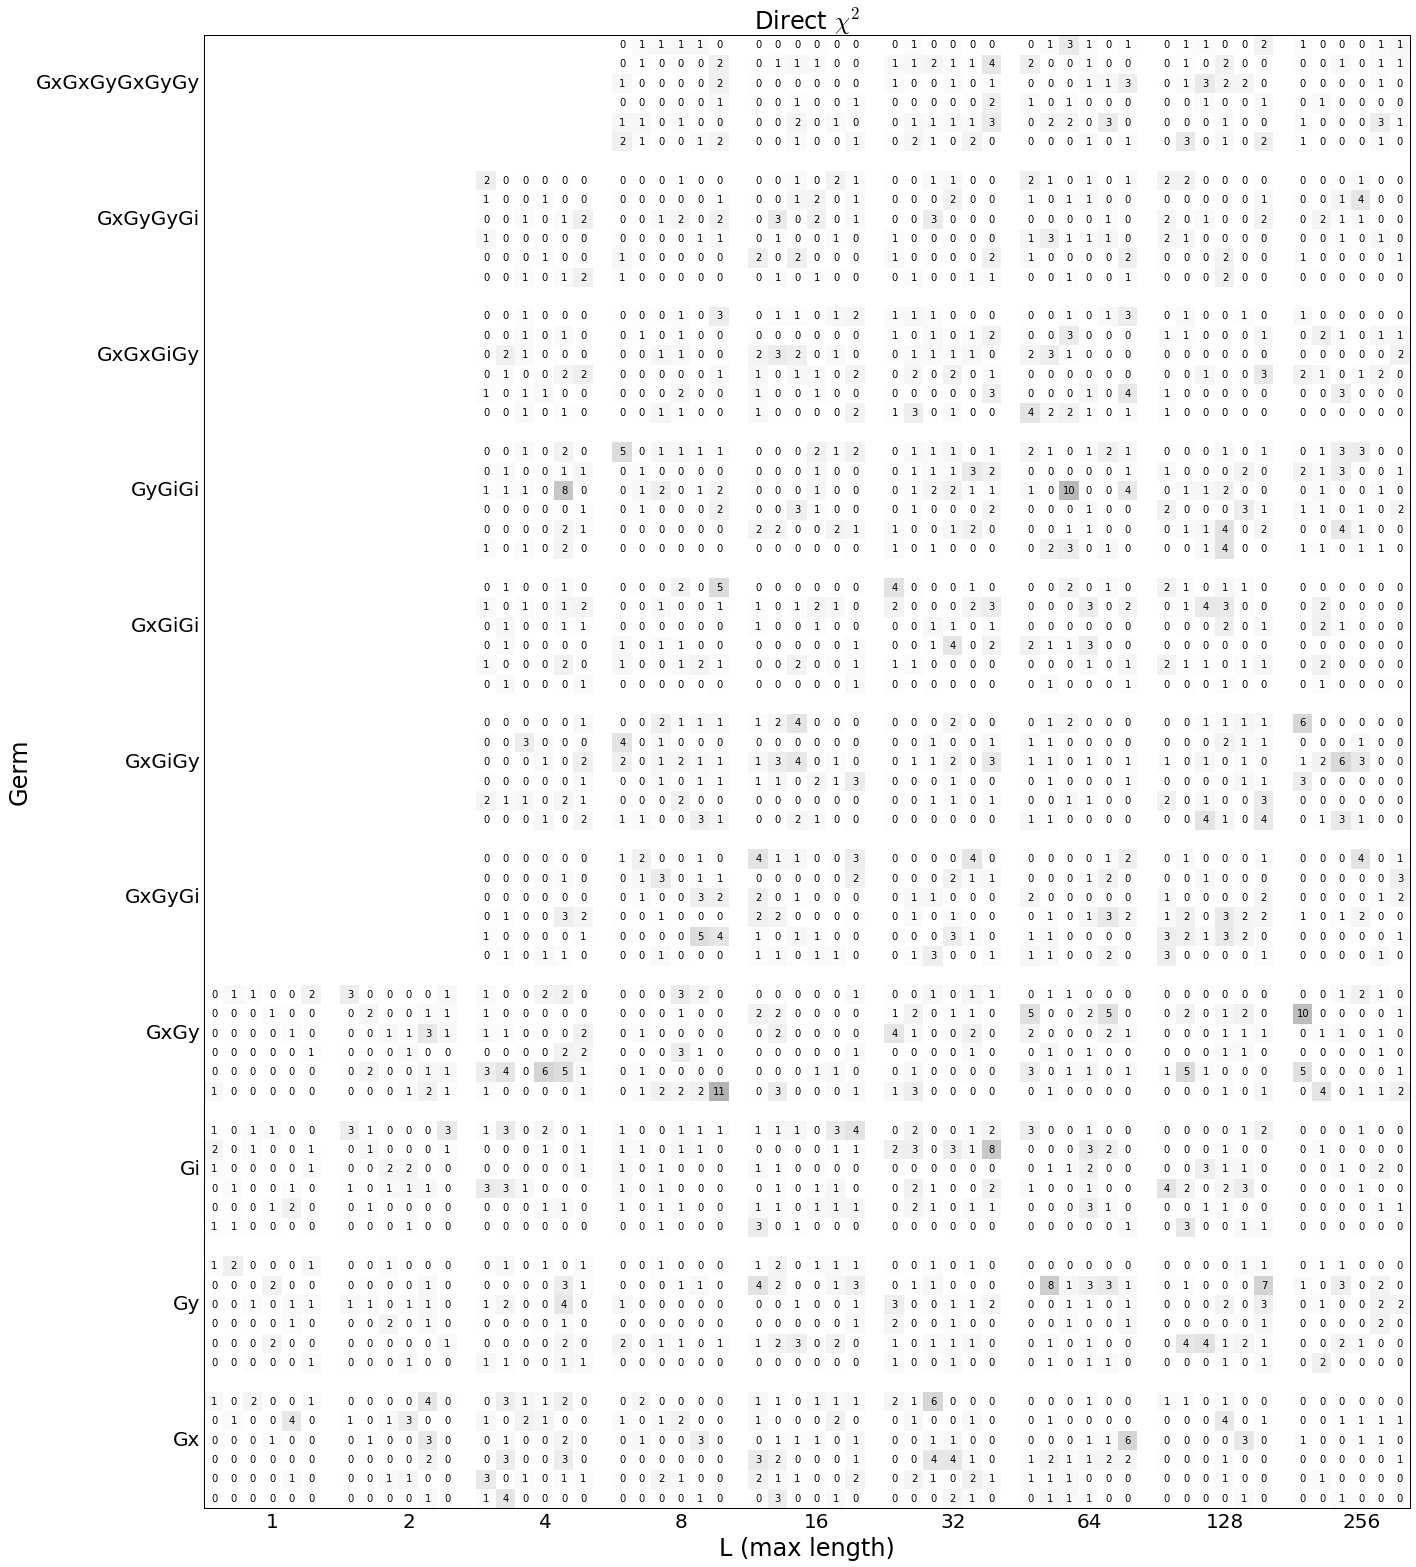

In [13]:
pplt.direct_chi2_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                          scale=1.0, boxLabels=True )

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:407: RuntimeWarning: invalid value encountered in greater
  resdat[resdat>0] /= abs(vmax - midpoint)
/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:408: RuntimeWarning: invalid value encountered in less
  resdat[resdat<0] /= abs(vmin - midpoint)


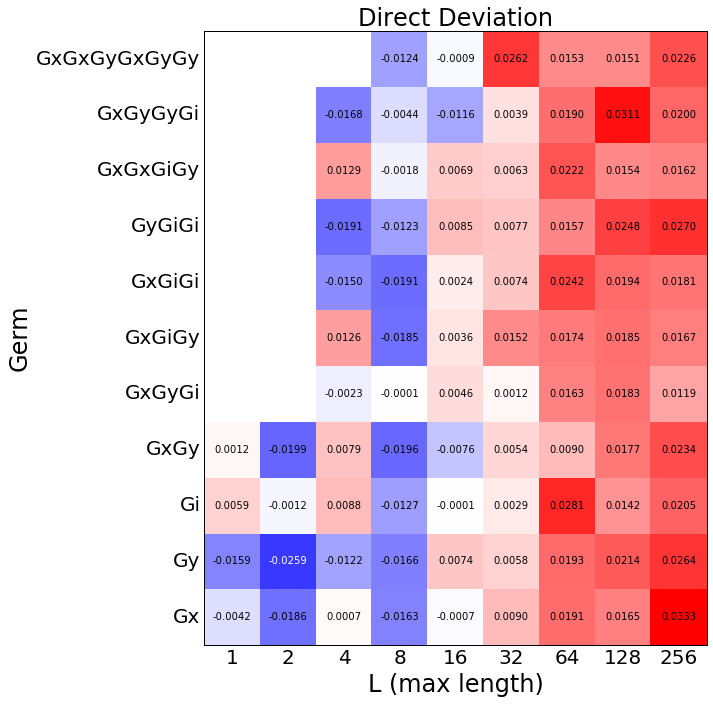

In [14]:
pplt.direct_deviation_boxplot(Xs, Ys, gateStrDict, ds, gs_mc2gst, directLSGST, xlbl, ylbl, prec=4,
                        scale=1.0, boxLabels=True)

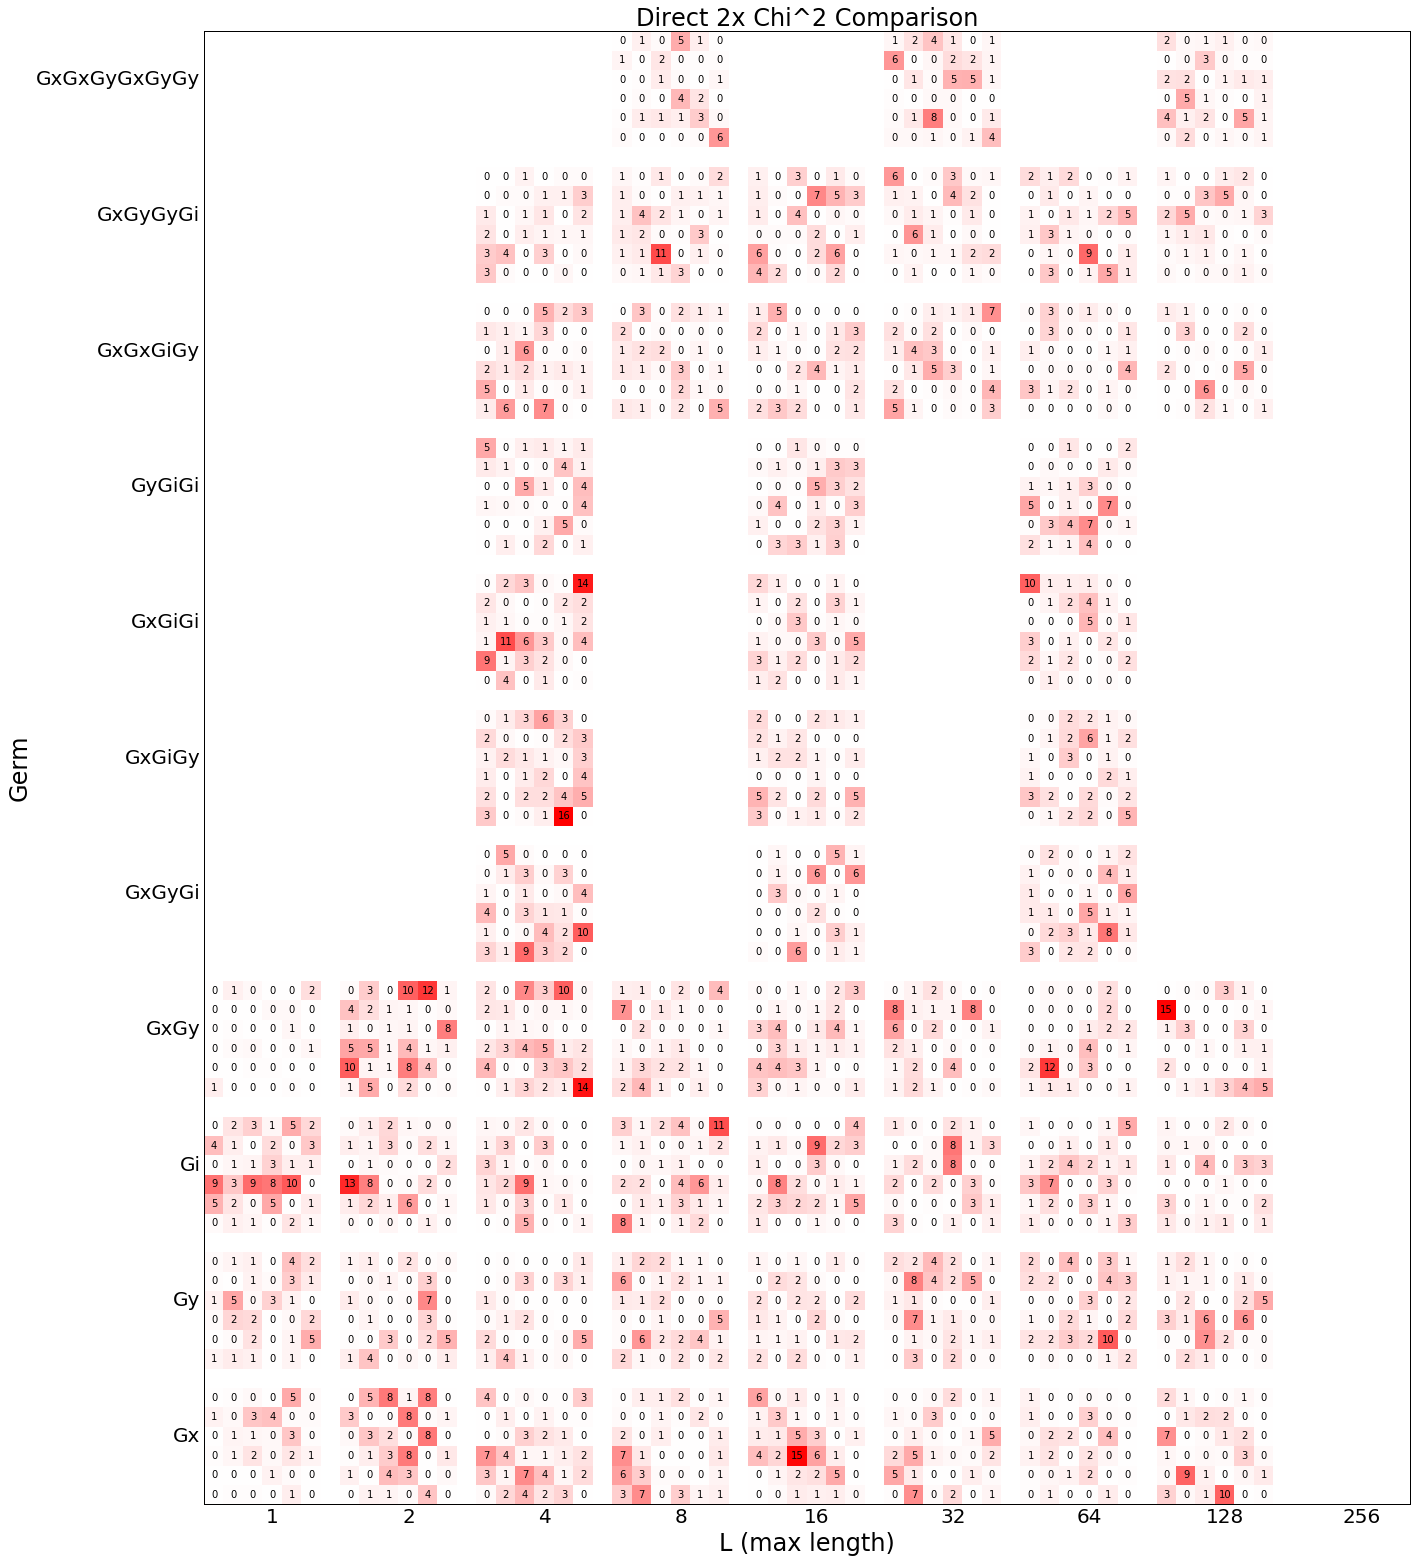

In [15]:
pplt.direct2x_comp_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                        scale=1.0, boxLabels=True )

## Error Rate Plots (uses Direct-X results)

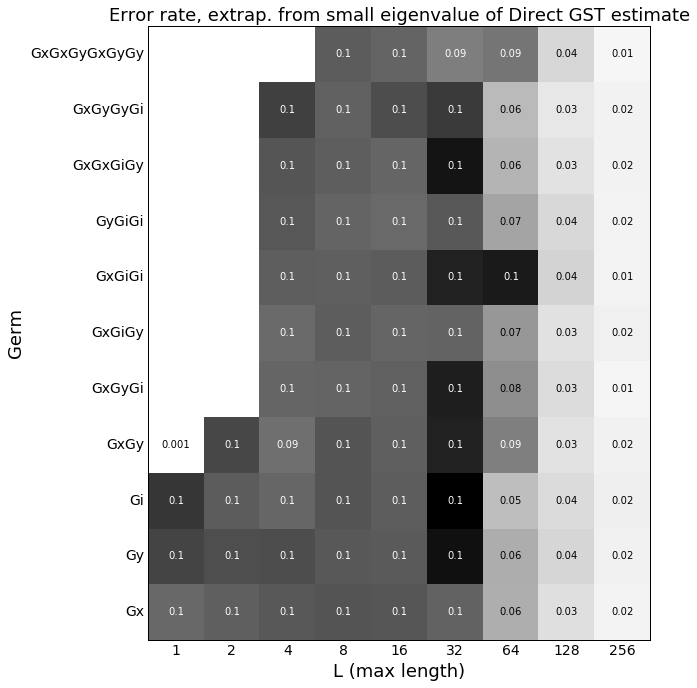

In [16]:
pplt.small_eigval_err_rate_boxplot(Xs, Ys, gateStrDict, ds, directLSGST, xlbl, ylbl,
                             scale=1.0, boxLabels=True)

## Whack-a-$\chi^2$-mole Plots

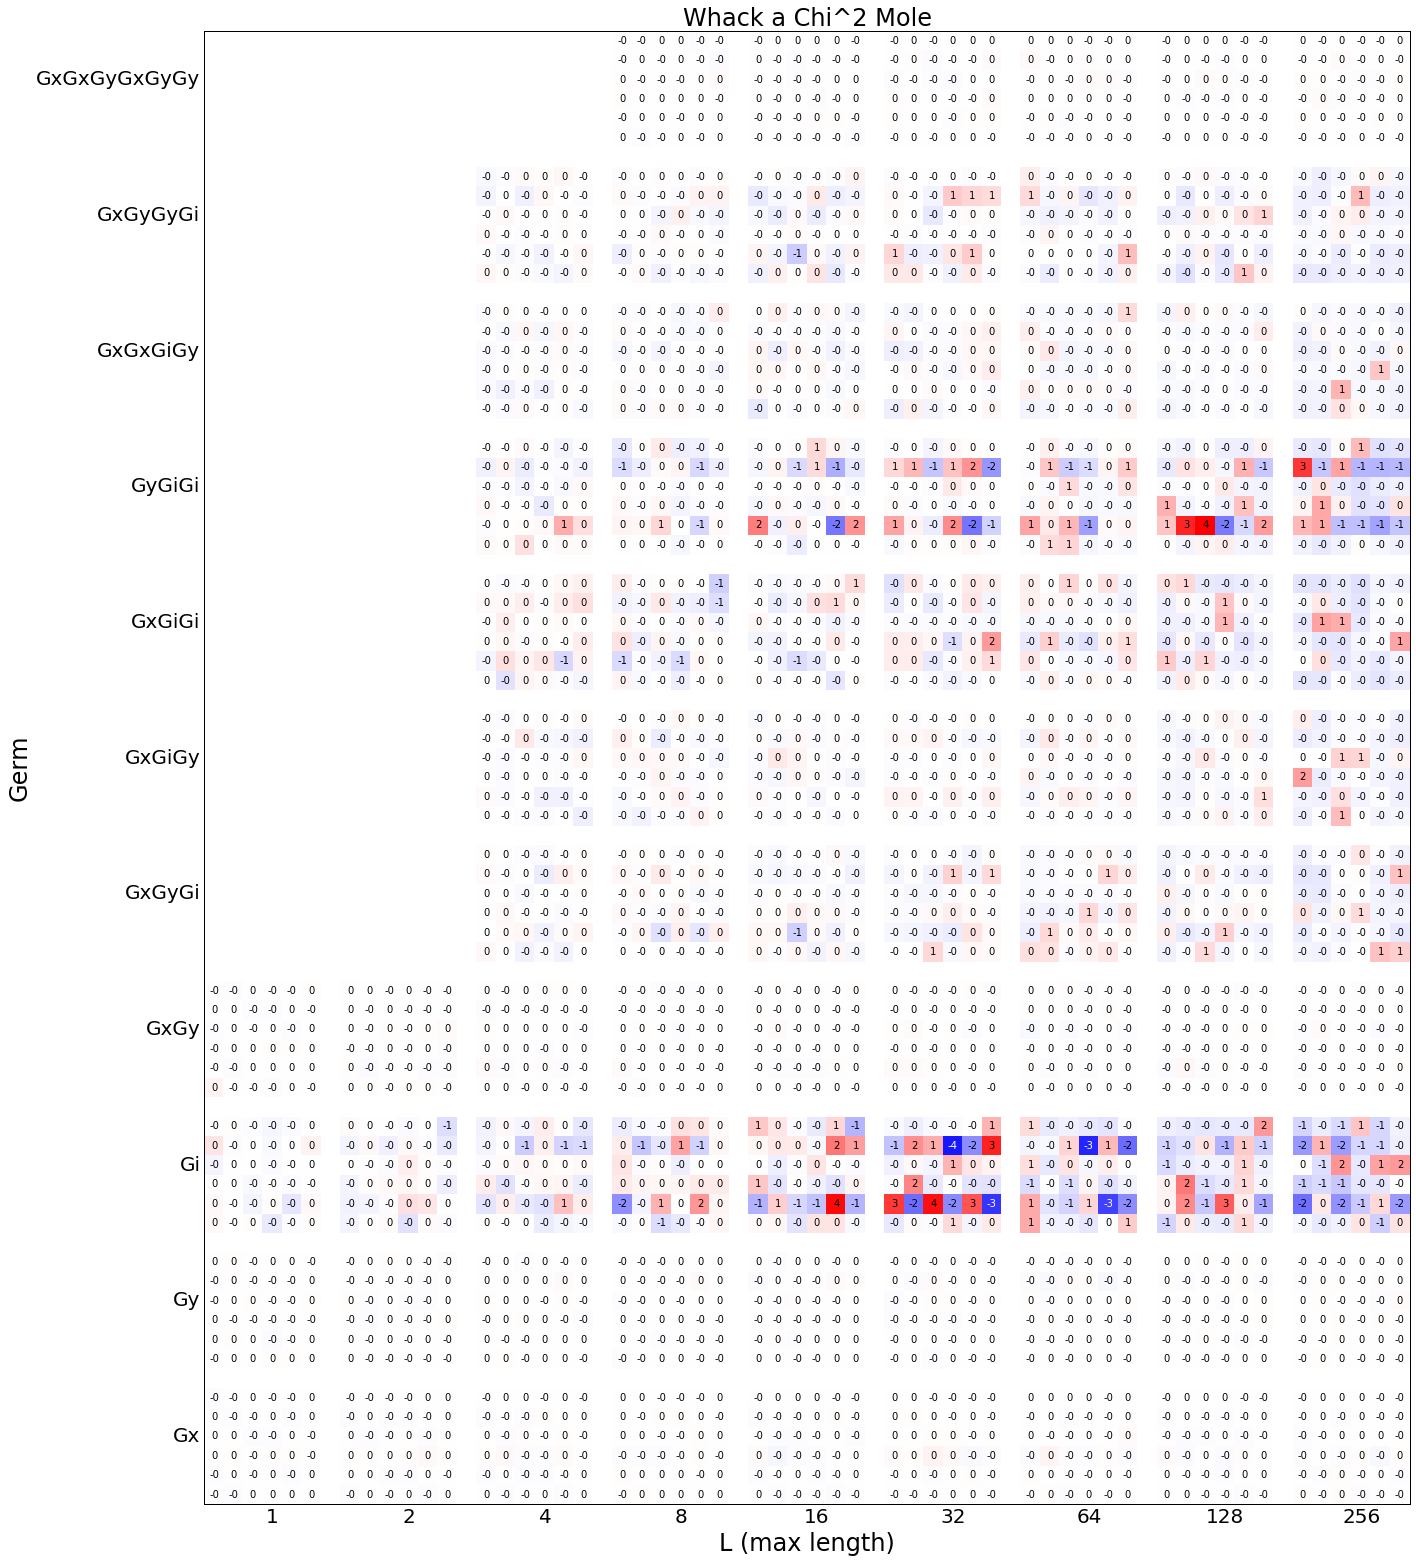

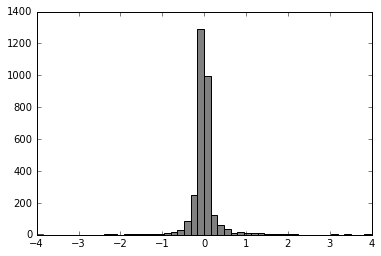

In [17]:
whack = pygsti.objects.GateString( ('Gi',)*256 )
fullGatestringList = pygsti.io.load_gatestring_list("tutorial_files/Example_LSGSTlist256.txt")
pplt.whack_a_chi2_mole_boxplot( whack, fullGatestringList, Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
               scale=1.0, sumUp=False, histogram=True )